# 半導体セクター比較

材料メーカー vs. 製造装置

In [67]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

In [68]:
def weekly_chart(ticker: yf.Ticker) -> pd.DataFrame:
    df = ticker.history(interval='1wk', period='2y')

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        mav=(13, 26, 52),
        volume=False,
        datetime_format='%Y-%m-%d',
        xrotation=0,
        ax=ax,
    )
    ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' % (ticker.info['longName'], ticker.info['symbol']))
    ax.grid()

    return df

## 東京エレクトロン

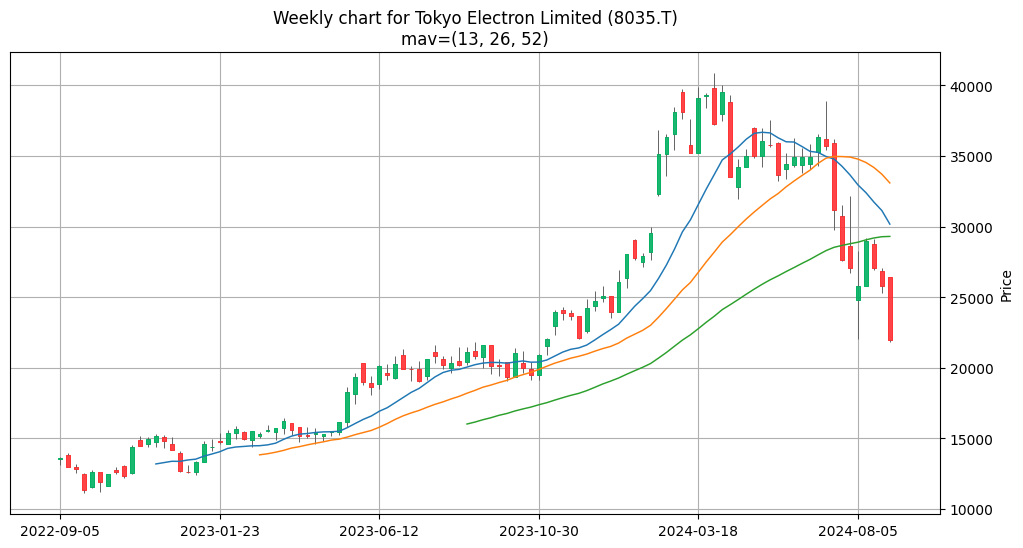

In [69]:
symbol1 = '8035.T' # 東京エレクトロン
ticker1 = yf.Ticker(symbol1)
df1 = weekly_chart(ticker1)
plt.savefig('weekly_chart_20240906_8035.png')
plt.show()

## 信越化学

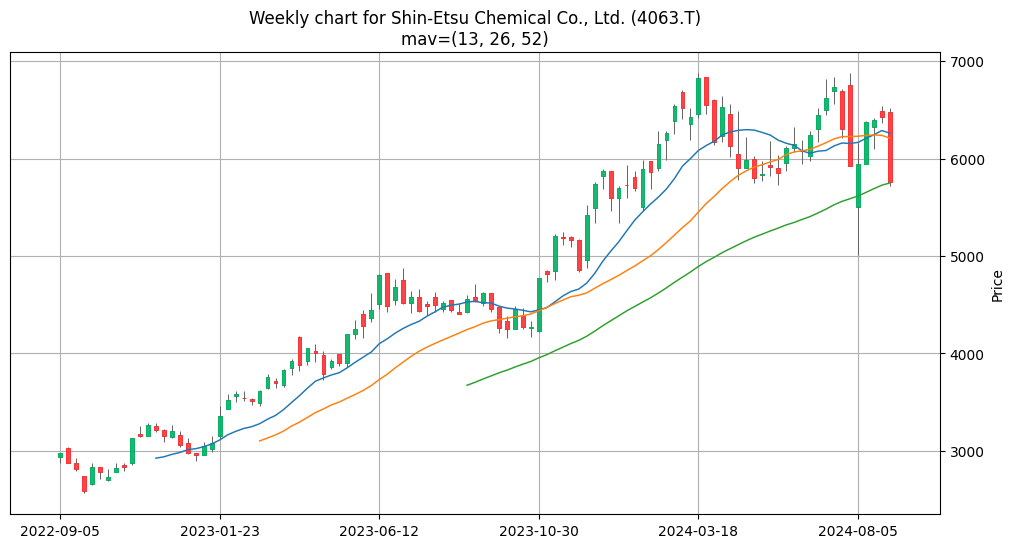

In [59]:
symbol2 = '4063.T' # 信越化学
ticker2 = yf.Ticker(symbol2)
df2 = weekly_chart(ticker2)
plt.savefig('weekly_chart_20240906_4063.png')
plt.show()

## TSMC (NYSE ADR)

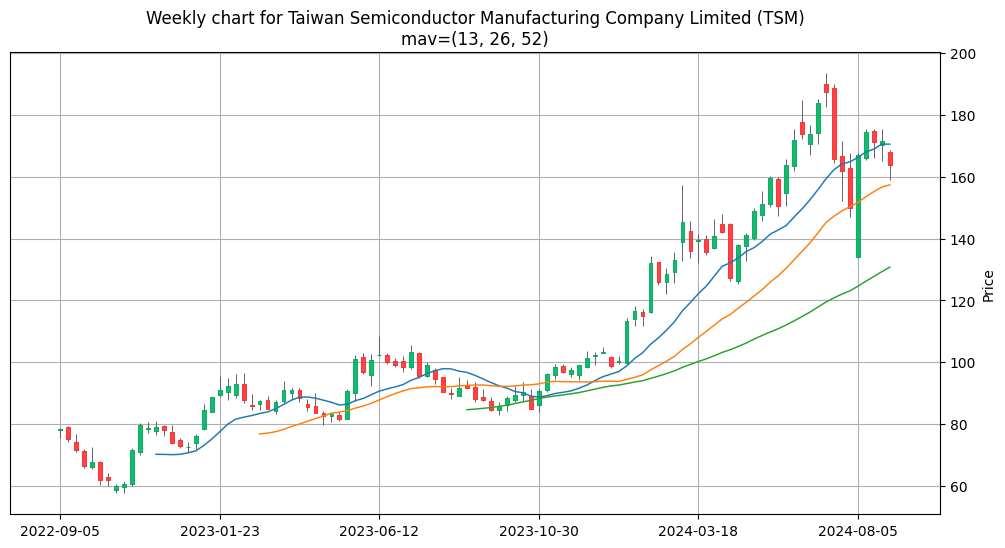

In [60]:
symbol3 = 'TSM' # TSMC
ticker3 = yf.Ticker(symbol3)
df3 = weekly_chart(ticker3)
plt.savefig('weekly_chart_20240906_tsmc.png')
plt.show()

In [61]:
def change_ratio(ticker, df):
    ser = pd.Series(df['Close'])
    origin = ser.iloc[0]
    return pd.Series([(v - origin) / origin for v in ser], name=ticker.info['symbol'], index=df.index)

In [62]:
series1 = change_ratio(ticker1, df1)
series2 = change_ratio(ticker2, df2)
series3 = change_ratio(ticker3, df3)

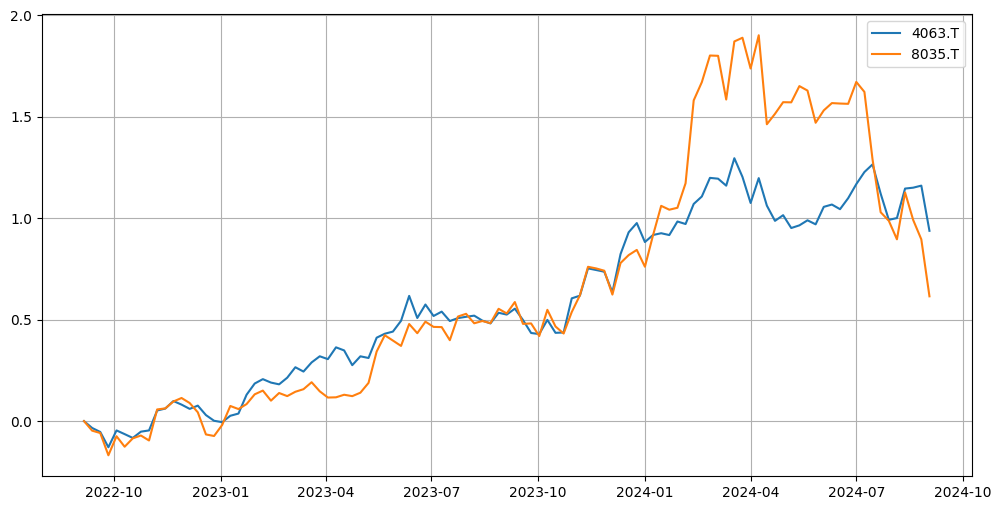

In [66]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(series2, label=series2.name)
ax.plot(series1, label=series1.name)
#ax.plot(series3, label=series3.name)

plt.legend(loc='best')
plt.grid()
plt.show()